In [ ]:
# !pip install polars

In [1]:
import os
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def read_parquet_by_type(train_path: str):
    # Lấy tất cả các file parquet trong thư mục
    files = [os.path.join(train_path, f) for f in os.listdir(train_path) if f.endswith('.parquet')]
    
    # Phân loại các file theo loại tên
    user_chunk_files = [file for file in files if 'user_chunk' in file]
    purchase_history_chunk_files = [file for file in files if 'purchase_history_daily_chunk' in file]
    item_chunk_files = [file for file in files if 'item_chunk' in file]
    
    # Đọc các file riêng biệt thành DataFrame
    user_chunk_df = pl.concat([pl.read_parquet(file) for file in user_chunk_files]) if user_chunk_files else None
    purchase_history_chunk_df = pl.concat([pl.read_parquet(file) for file in purchase_history_chunk_files]) if purchase_history_chunk_files else None
    item_chunk_df = pl.concat([pl.read_parquet(file) for file in item_chunk_files]) if item_chunk_files else None
    
    # Trả về một dictionary chứa các DataFrame
    return {
        "user_chunk": user_chunk_df,
        "purchase_history_chunk": purchase_history_chunk_df,
        "item_chunk": item_chunk_df
    }

In [3]:
data = read_parquet_by_type("C:/Users/tncn2/Downloads/recommendation dataset")

history_df = data["purchase_history_chunk"]
# user_df = data["user_chunk"]
# item_df = data["item_chunk"]

In [14]:
print("History DataFrame:")
history_df 

History DataFrame:


timestamp,user_id,item_id,event_type,event_value,price,date_key,quantity,customer_id,created_date,updated_date,channel,payment,location,discount,is_deleted
i64,str,str,str,"decimal[38,4]","decimal[38,4]",i32,i32,i32,datetime[μs],datetime[μs],str,str,i32,"decimal[38,4]",bool
1735064221,"""ca12702ddf55acaa9fb767e10faaa6…","""7115000000004""","""Purchase""",1.0000,49000.0000,20241224,1,5254214,2024-12-24 18:17:01.027,2024-12-24 18:20:09.453,"""In-Store""","""VietQR""",656,0.0000,false
1735068481,"""54314ce86269f4849f9a4c3fc85d94…","""0029130000030""","""Purchase""",1.0000,69000.0000,20241224,1,7573232,2024-12-24 19:28:01.870,2024-12-24 19:28:01.870,"""In-Store""","""Tiền mặt""",143,0.0000,false
1735069843,"""4799de4022b58689b2b9fb37122479…","""3496000000053""","""Purchase""",2.0000,75000.0000,20241224,2,8187418,2024-12-24 19:50:43.760,2024-12-24 19:50:43.760,"""In-Store""","""MoMo""",213,0.0000,false
1735069779,"""4799de4022b58689b2b9fb37122479…","""2700000000002""","""Purchase""",2.0000,58500.0000,20241224,2,8187418,2024-12-24 19:49:39.223,2024-12-24 19:49:39.223,"""In-Store""","""MoMo""",213,13000.0000,false
1735379373,"""3b2423f730815273dfd6f6220b0c5c…","""0029110000036""","""Purchase""",1.0000,89000.0000,20241228,1,6931560,2024-12-28 09:49:33.780,2024-12-28 10:28:49.413,"""Android""","""MoMo""",590,10000.0000,false
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1729268913,"""a6fc68430e2654c90a06f64be11a98…","""1396000000020""","""Purchase""",1.0000,28050.0000,20241018,1,6848354,2024-10-18 16:28:33.130,2024-10-18 16:28:33.130,"""In-Store""","""Tiền mặt""",446,4950.0000,false
1729345219,"""ac1dddd7c809e0b473d23f36d349eb…","""0007070000403""","""Purchase""",1.0000,189000.0000,20241019,1,5745481,2024-10-19 13:40:19.900,2024-10-19 13:40:19.900,"""iOS""","""Tiền mặt""",228,0.0000,false
1729335081,"""191d6a3053c0dfed3a2a79586e0f89…","""4371000000001""","""Purchase""",1.0000,59000.0000,20241019,1,3307869,2024-10-19 10:51:21.297,2024-10-19 10:51:21.317,"""In-Store""","""Tiền mặt""",368,0.0000,false


In [25]:
print(history_df.shape)

(35729825, 16)


In [13]:
print("Rows:", history_df.height)
print("Columns:", history_df.width)

Rows: 35729825
Columns: 16


In [17]:
for col, dtype in history_df.schema.items():
    print(f"{col:30}  {dtype}")

timestamp                       Int64
user_id                         String
item_id                         String
event_type                      String
event_value                     Decimal(precision=38, scale=4)
price                           Decimal(precision=38, scale=4)
date_key                        Int32
quantity                        Int32
customer_id                     Int32
created_date                    Datetime(time_unit='us', time_zone=None)
updated_date                    Datetime(time_unit='us', time_zone=None)
channel                         String
payment                         String
location                        Int32
discount                        Decimal(precision=38, scale=4)
is_deleted                      Boolean


Task 1

In [24]:
print(history_df.select(["price", "discount", "quantity"]).describe())

shape: (9, 4)
┌────────────┬───────────────┬──────────────┬─────────────┐
│ statistic  ┆ price         ┆ discount     ┆ quantity    │
│ ---        ┆ ---           ┆ ---          ┆ ---         │
│ str        ┆ f64           ┆ f64          ┆ f64         │
╞════════════╪═══════════════╪══════════════╪═════════════╡
│ count      ┆ 3.5729825e7   ┆ 3.5729825e7  ┆ 3.5729825e7 │
│ null_count ┆ 0.0           ┆ 0.0          ┆ 0.0         │
│ mean       ┆ 169188.742494 ┆ 17235.651914 ┆ 1.508098    │
│ std        ┆ 195539.88976  ┆ 46673.708499 ┆ 2.264976    │
│ min        ┆ 0.0444        ┆ 0.0          ┆ 1.0         │
│ 25%        ┆ 48316.3914    ┆ 0.0          ┆ 1.0         │
│ 50%        ┆ 87000.0       ┆ 0.0          ┆ 1.0         │
│ 75%        ┆ 244000.0      ┆ 15000.0      ┆ 1.0         │
│ max        ┆ 2.099e7       ┆ 7.995e6      ┆ 240.0       │
└────────────┴───────────────┴──────────────┴─────────────┘


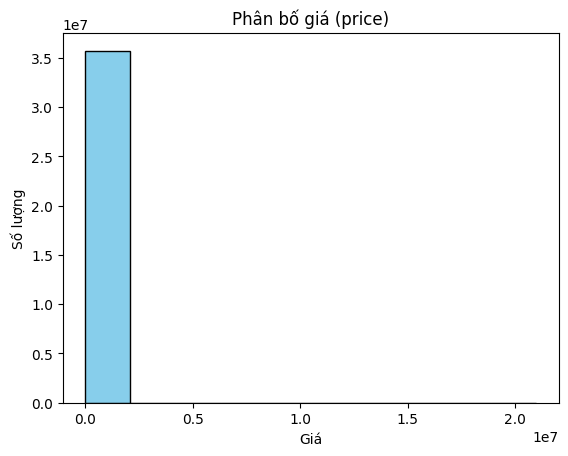

In [30]:
plt.hist(history_df["price"].to_numpy(), color="skyblue", edgecolor="black")
plt.title("Phân bố giá (price)")
plt.xlabel("Giá")
plt.ylabel("Số lượng")
plt.show()

In [31]:
num_cols = ["price", "discount", "event_value", "quantity"]

for col in num_cols:
    print(f"\n Thống kê cho cột {col}:")
    print(history_df.select([
        pl.col(col).mean().alias("mean"),
        pl.col(col).median().alias("median"),
        pl.col(col).std().alias("std"),
        pl.col(col).min().alias("min"),
        pl.col(col).max().alias("max"),
        pl.col(col).null_count().alias("nulls"),
    ]))


 Thống kê cho cột price:
shape: (1, 6)
┌───────────────┬─────────┬──────────────┬───────────────┬───────────────┬───────┐
│ mean          ┆ median  ┆ std          ┆ min           ┆ max           ┆ nulls │
│ ---           ┆ ---     ┆ ---          ┆ ---           ┆ ---           ┆ ---   │
│ f64           ┆ f64     ┆ f64          ┆ decimal[38,4] ┆ decimal[38,4] ┆ u32   │
╞═══════════════╪═════════╪══════════════╪═══════════════╪═══════════════╪═══════╡
│ 169188.742494 ┆ 87000.0 ┆ 195539.88976 ┆ 0.0444        ┆ 20990000.0000 ┆ 0     │
└───────────────┴─────────┴──────────────┴───────────────┴───────────────┴───────┘

 Thống kê cho cột discount:
shape: (1, 6)
┌──────────────┬────────┬──────────────┬───────────────┬───────────────┬───────┐
│ mean         ┆ median ┆ std          ┆ min           ┆ max           ┆ nulls │
│ ---          ┆ ---    ┆ ---          ┆ ---           ┆ ---           ┆ ---   │
│ f64          ┆ f64    ┆ f64          ┆ decimal[38,4] ┆ decimal[38,4] ┆ u32   │
╞═══════════

In [42]:
# Các cột phân loại đã được liệt kê
categorical_columns = [
    'event_type', 'channel', 'payment', 'location', 'is_deleted'
]

# Tạo một danh sách để lưu các DataFrame tần suất của từng cột
value_counts_list = []

for col in categorical_columns:
    # Đếm tần suất cho mỗi cột
    value_counts = history_df[col].value_counts(sort=True)
    
    # Đổi tên các cột để dễ nhận diện
    value_counts = value_counts.rename({"count": f"{col}_count", col: f"{col}_value"})
    
    # Lưu DataFrame vào danh sách
    value_counts_list.append(value_counts)
    
    # Xuất DataFrame cho mỗi cột
    print(f"Tần suất cho cột '{col}':")
    print(value_counts)
    print("\n")

Tần suất cho cột 'event_type':
shape: (1, 2)
┌──────────────────┬──────────────────┐
│ event_type_value ┆ event_type_count │
│ ---              ┆ ---              │
│ str              ┆ u32              │
╞══════════════════╪══════════════════╡
│ Purchase         ┆ 35729825         │
└──────────────────┴──────────────────┘


Tần suất cho cột 'channel':
shape: (11, 2)
┌────────────────┬───────────────┐
│ channel_value  ┆ channel_count │
│ ---            ┆ ---           │
│ str            ┆ u32           │
╞════════════════╪═══════════════╡
│ In-Store       ┆ 33016358      │
│ iOS            ┆ 1397128       │
│ SPE            ┆ 602896        │
│ Android        ┆ 483885        │
│ Web            ┆ 146401        │
│ …              ┆ …             │
│ CRM Partner    ┆ 16640         │
│ Chat           ┆ 2310          │
│ Wholesale      ┆ 162           │
│ Không xác định ┆ 119           │
│ TKS            ┆ 2             │
└────────────────┴───────────────┘


Tần suất cho cột 'payment':
shape

In [45]:
# Các cột phân loại đã được liệt kê
categorical_columns = [
    'event_type', 'channel', 'payment', 'location', 'is_deleted'
]

# Tạo một danh sách để lưu các DataFrame thống kê cho từng cột
mode_dataframes = []

# Tính toán mode cho mỗi cột phân loại
for col in categorical_columns:
    # Tính giá trị mode (giá trị xuất hiện nhiều nhất) mà không sử dụng .to_pandas()
    mode_val = history_df[col].mode()[0]  # mode() trả về một Series, ta lấy giá trị đầu tiên
    
    # Ép kiểu giá trị mode về dạng string để tránh lỗi khi gộp DataFrame
    mode_val = str(mode_val)
    
    # Tạo một DataFrame cho từng cột chứa mode
    mode_df = pl.DataFrame({
        "Column": [col],
        "Mode": [mode_val]
    })
    
    # Lưu DataFrame vào danh sách
    mode_dataframes.append(mode_df)
    
    # In từng DataFrame thống kê mode cho cột
    print(f"Mode của cột '{col}': {mode_val}")

# Ghép tất cả các DataFrame mode vào một bảng duy nhất
final_mode_df = pl.concat(mode_dataframes, how="vertical")

# In kết quả final_mode_df
final_mode_df


Mode của cột 'event_type': Purchase
Mode của cột 'channel': In-Store
Mode của cột 'payment': Tiền mặt
Mode của cột 'location': 645
Mode của cột 'is_deleted': False


Column,Mode
str,str
"""event_type""","""Purchase"""
"""channel""","""In-Store"""
"""payment""","""Tiền mặt"""
"""location""","""645"""
"""is_deleted""","""False"""


In [35]:
history_df = history_df.with_columns([
    pl.col(col).cast(pl.Float64)
    for col, dtype in history_df.schema.items()
    if "Decimal" in str(dtype)
])

In [7]:
discount_np = history_df["discount"].cast(pl.Float64).to_numpy()

# Tính ngưỡng 99th percentile
threshold = np.percentile(discount_np, 99)

# Lọc các giá trị vượt ngưỡng (outlier)
outliers = history_df.filter(pl.col("discount").cast(pl.Float64) > threshold)

print("Ngưỡng 99%:", threshold)
print("Số lượng outlier:", outliers.height)

Ngưỡng 99%: 201432.38682399815
Số lượng outlier: 357299


In [9]:
discount_np = history_df["discount"].cast(pl.Float64).to_numpy()

# Tính các giá trị quartile
Q1 = np.percentile(discount_np, 25)
Q3 = np.percentile(discount_np, 75)
IQR = Q3 - Q1

# Xác định ngưỡng outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc outliers
outliers_iqr = history_df.filter(
    (pl.col("discount").cast(pl.Float64) < lower_bound) |
    (pl.col("discount").cast(pl.Float64) > upper_bound)
)

# In kết quả
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"Số lượng outlier (IQR): {outliers_iqr.height}")

Q1: 0.0
Q3: 15000.0
IQR: 15000.0
Lower bound: -22500.0
Upper bound: 37500.0
Số lượng outlier (IQR): 4839178


In [8]:
print(history_df["discount"].cast(pl.Float64).min(), 
      history_df["discount"].cast(pl.Float64).max())

0.0 7995000.0


In [5]:
price_np = history_df["price"].cast(pl.Float64).to_numpy()

# Tính ngưỡng 99th percentile
threshold = np.percentile(price_np, 99)

# Lọc outlier
outliers = history_df.filter(pl.col("price").cast(pl.Float64) > threshold)

print("Ngưỡng 99%:", threshold)
print("Số lượng outlier:", outliers.height)

Ngưỡng 99%: 805000.0
Số lượng outlier: 347380


In [10]:
price_np = history_df["price"].cast(pl.Float64).to_numpy()

# Bước 2: Tính các giá trị phân vị (quartile)
Q1 = np.percentile(price_np, 25)
Q3 = np.percentile(price_np, 75)
IQR = Q3 - Q1

# Bước 3: Tính giới hạn phát hiện outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Bước 4: Lọc ra các giá trị outlier
outliers_iqr_price = history_df.filter(
    (pl.col("price").cast(pl.Float64) < lower_bound) |
    (pl.col("price").cast(pl.Float64) > upper_bound)
)

# Bước 5: In kết quả thống kê
print("📊 Thống kê IQR cho cột 'price'")
print(f"Q1 (25%): {Q1:,.2f}")
print(f"Q3 (75%): {Q3:,.2f}")
print(f"IQR (Q3 - Q1): {IQR:,.2f}")
print(f"Ngưỡng dưới (Lower bound): {lower_bound:,.2f}")
print(f"Ngưỡng trên (Upper bound): {upper_bound:,.2f}")
print(f"Số lượng outlier: {outliers_iqr_price.height:,}")
print(f"Tỉ lệ outlier: {outliers_iqr_price.height / history_df.height:.2%}")

📊 Thống kê IQR cho cột 'price'
Q1 (25%): 48,316.39
Q3 (75%): 244,000.00
IQR (Q3 - Q1): 195,683.61
Ngưỡng dưới (Lower bound): -245,209.02
Ngưỡng trên (Upper bound): 537,525.41
Số lượng outlier: 2,307,238
Tỉ lệ outlier: 6.46%


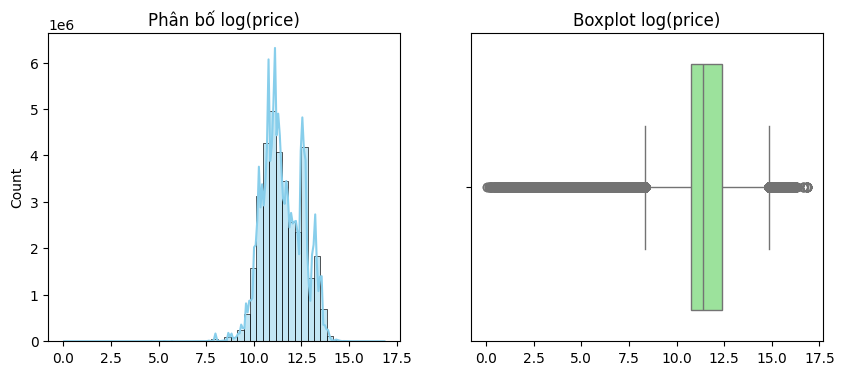

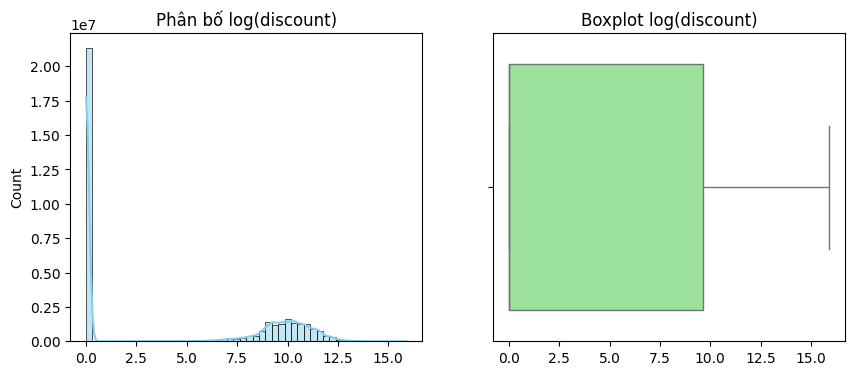

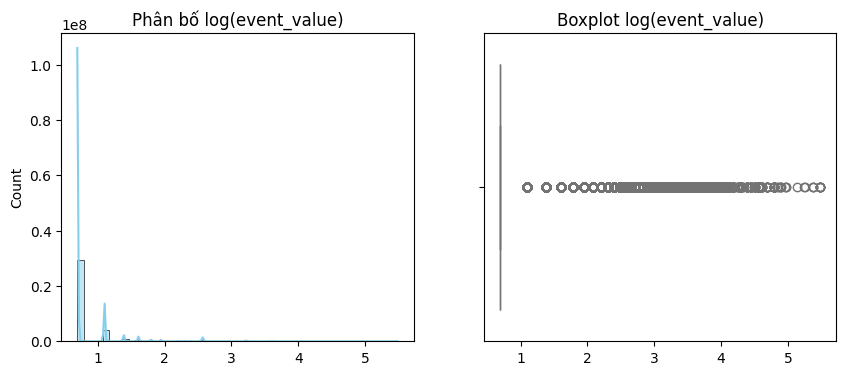

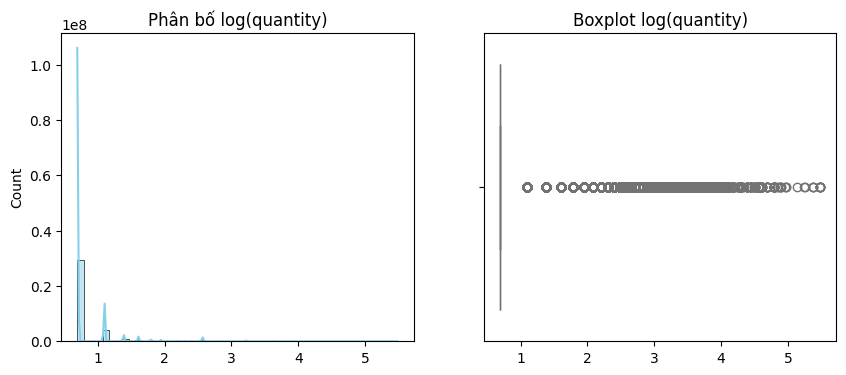

In [36]:
for col in num_cols:
    plt.figure(figsize=(10,4))

    # Histogram theo log
    plt.subplot(1,2,1)
    sns.histplot(np.log1p(history_df[col].to_numpy()), kde=True, bins=50, color="skyblue")
    plt.title(f"Phân bố log({col})")
    
    # Boxplot theo log
    plt.subplot(1,2,2)
    sns.boxplot(x=np.log1p(history_df[col].to_numpy()), color="lightgreen")
    plt.title(f"Boxplot log({col})")

    plt.show()
